# Problem Background

#### XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

# Project delivery:

#### Four data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using insights to help them identify the right company to make their investment.

# Project Outcome
#### The outcome of delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of analysis and the value of recommendations and insights. 

# About Data Set:

#### The original data comes from the Data Glacier repository on Github

#### You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018. Below are the list of datasets which are provided for the analysis:

#### Cab_Data.csv – this file includes details of transaction for 2 cab companies

#### Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

#### Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

#### City.csv – this file contains list of US cities, their population and number of cab users

# 1. Data Overview

### In this part data files and types have been explored to get familiar with dataset (features), find any missing or duplicate entries in dataset.

In [1]:
#importing required library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

In [2]:
# Load Dataset
cd = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
cid = pd.read_csv('Customer_ID.csv')
tid = pd.read_csv('Transaction_ID.csv')

In [3]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


#### All Seven columns have the same count as the total number of entries (359392), which means there are no null (missing) values in any of the columns, later we find there are no null values in any data frame

In [4]:
cd.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


# 2. Data Preprocessing

## 2.1 Date Format Correction
### We can see that the date format is just numbers instead of dates. We can use reference date correction of microsoft excel/csv i.e 1st Jan 1900 and correct it. In relation to the data set start and end date which is from 1st Jan 2016 to 31st December 2018 (3 years). So in the below code we have adjusted the dates accordinly. 
### Also we will create a profit feature in our dataframe assumption being profit is calculated only on two features that is Cost of trip and the price charged.

In [5]:
reference_date = pd.to_datetime('1899-12-30')

# Convert the numerical values to datetime.
cd['Date of Travel'] = reference_date + pd.to_timedelta(cd['Date of Travel'], unit='D')

# filter the data based on dataset dates.
start_date = '2016-01-01'
end_date = '2018-12-31'

# Filter it.
cd = cd[(cd['Date of Travel'] >= start_date) & (cd['Date of Travel'] <= end_date)]

In [6]:
## Profit Calculation
cd['Profit'] = cd['Price Charged'] - cd['Cost of Trip']

In [7]:
city.head(20)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [8]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [9]:
city['Users'].unique()

array([' 302,149 ', ' 164,468 ', ' 144,132 ', ' 17,675 ', ' 27,247 ',
       ' 12,994 ', ' 69,995 ', ' 6,133 ', ' 22,157 ', ' 24,701 ',
       ' 12,421 ', ' 14,978 ', ' 25,063 ', ' 5,712 ', ' 213,609 ',
       ' 7,044 ', ' 3,643 ', ' 127,001 ', ' 9,270 ', ' 80,021 '],
      dtype=object)

In [10]:
city['Population'].unique()

array([' 8,405,837 ', ' 1,955,130 ', ' 1,595,037 ', ' 1,339,155 ',
       ' 1,177,609 ', ' 1,030,185 ', ' 959,307 ', ' 943,999 ',
       ' 942,908 ', ' 814,885 ', ' 754,233 ', ' 698,371 ', ' 671,238 ',
       ' 631,442 ', ' 629,591 ', ' 545,776 ', ' 542,085 ', ' 418,859 ',
       ' 327,225 ', ' 248,968 '], dtype=object)

## 2.2 City Data Cleaning
### We can see that user and population column contains values with commas and leading/trailing spaces, causing it to be treated as an object (string) type. In order to correct it we will use following code and convert the data type to int64

In [11]:
# Convert 'Users' and 'Population' columns to int64 and remove spaces and commas in cd Dataframe
city['Users'] = city['Users'].str.replace(',', '').str.strip().astype('int64')
city['Population'] = city['Population'].str.replace(',', '').str.strip().astype('int64')

In [12]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


# 3. Exploratory Data Analysis (EDA)

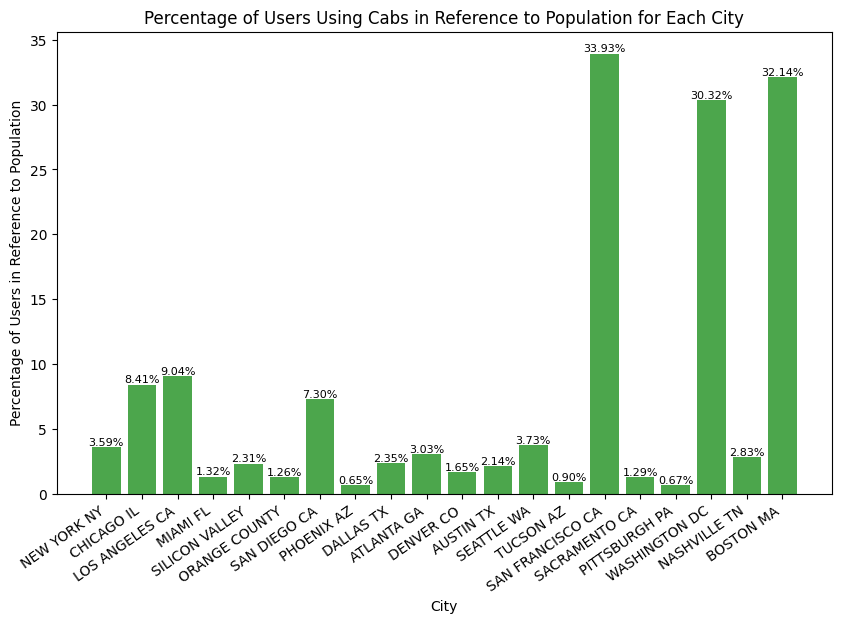

In [13]:
# Calculate the percentage of users in each city
city['Percentage Users'] = (city['Users'] / city['Population']) * 100

# Defining barplot inputs
plt.figure(figsize=(10, 6))
bars = plt.bar(city['City'], city['Percentage Users'], color='green', alpha=0.7)

# numbers above the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}%', 
             ha='center', va='bottom', color='black', fontsize=8)
plt.xticks(rotation=35, ha='right')

# labels and title
plt.xlabel('City')
plt.ylabel('Percentage of Users in Reference to Population')
plt.title('Percentage of Users Using Cabs in Reference to Population for Each City')
plt.show()

We can see that SanFrancisco CA, Washington DC and Boston has the highest numbers of users

In [14]:
cid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [15]:
cid.head(10)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [16]:
tid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [17]:
tid.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


### 3.1 Merging Four Dataset to create a Masterdata file (Data Merging)

#### In this code, the Masterdata dataframe is created by merging information from four datasets (cd, tid, cid, and city). The merging is performed sequentially using the 'Transaction ID', 'Customer ID', and 'City' columns to consolidate details about cab transactions, customer demographics, transaction-to-customer mapping, and city information into a unified dataset for further analysis.

In [18]:
Masterdata = cd.merge(tid, on='Transaction ID')\
                     .merge(cid, on='Customer ID')\
                     .merge(city, on='City')

In [19]:
Masterdata.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Percentage Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813,814885,24701,3.031225
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,Cash,Male,28,10813,814885,24701,3.031225
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290,Card,Male,28,10813,814885,24701,3.031225
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,Male,27,9237,814885,24701,3.031225
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,27703,Card,Male,27,9237,814885,24701,3.031225


In [20]:
Masterdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Profit              359392 non-null  float64       
 8   Customer ID         359392 non-null  int64         
 9   Payment_Mode        359392 non-null  object        
 10  Gender              359392 non-null  object        
 11  Age                 359392 non-null  int64         
 12  Income (USD/Month)  359392 non-null  int64         
 13  Population          359392 no

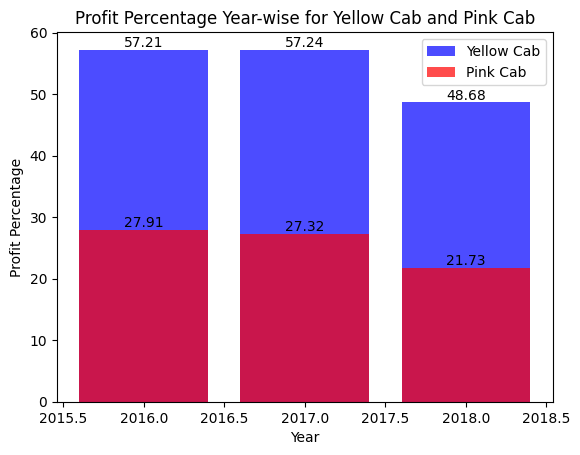

In [21]:
# Extract the year
Masterdata['Year'] = Masterdata['Date of Travel'].dt.to_period('Y').dt.year.astype(int)

# Calculate profit percentage
Masterdata['Profit Percentage'] = (Masterdata['Profit'] / Masterdata['Cost of Trip']) * 100

# Filter data for Yellow Cab
yellow_cab_data = Masterdata[Masterdata['Company'] == 'Yellow Cab']

# Data for Pink Cab
pink_cab_data = Masterdata[Masterdata['Company'] == 'Pink Cab']

# Groupby by year and find the average profit percentage
yellow_cab_profit_percentage = yellow_cab_data.groupby('Year')['Profit Percentage'].mean()
pink_cab_profit_percentage = pink_cab_data.groupby('Year')['Profit Percentage'].mean()

plt.bar(yellow_cab_profit_percentage.index, yellow_cab_profit_percentage, label='Yellow Cab', color='blue', alpha=0.7)
plt.bar(pink_cab_profit_percentage.index, pink_cab_profit_percentage, label='Pink Cab', color='red', alpha=0.7)

# Annotate values on top of the bars
for x, y in zip(yellow_cab_profit_percentage.index, yellow_cab_profit_percentage):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', color='black')

for x, y in zip(pink_cab_profit_percentage.index, pink_cab_profit_percentage):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', color='black')

# Plotting with labels and title
plt.xlabel('Year')
plt.ylabel('Profit Percentage')
plt.title('Profit Percentage Year-wise for Yellow Cab and Pink Cab')
plt.legend()
plt.show()

Yellow cab has more profit % as compared to pink cab company

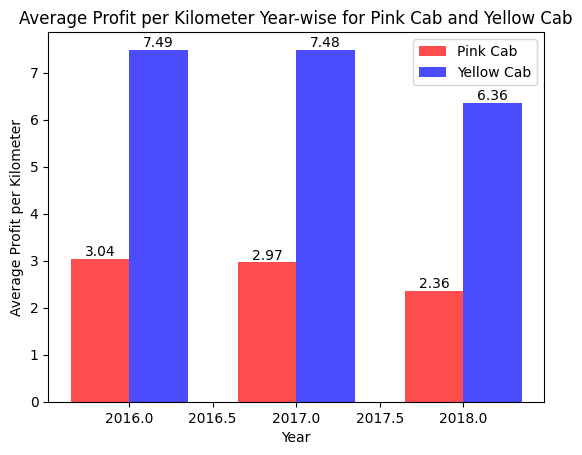

In [22]:
Masterdata['Year'] = Masterdata['Date of Travel'].dt.to_period('Y').dt.year.astype(int)

# Calculate total profit and kilometers
total_profit = Masterdata.groupby(['Year', 'Company'])['Profit'].sum()
total_km = Masterdata.groupby(['Year', 'Company'])['KM Travelled'].sum()

# Calculate average profit per kilometer
avg_profit_per_km = (total_profit / total_km).reset_index()

# Separate for Pink Cab and Yellow Cab
pink_cab_data = avg_profit_per_km[avg_profit_per_km['Company'] == 'Pink Cab']
yellow_cab_data = avg_profit_per_km[avg_profit_per_km['Company'] == 'Yellow Cab']

# Plotting
bar_width = 0.35
bar_positions_pink = pink_cab_data['Year'] - bar_width / 2
bar_positions_yellow = yellow_cab_data['Year'] + bar_width / 2

plt.bar(bar_positions_pink, pink_cab_data[0], label='Pink Cab', width=bar_width, color='red', alpha=0.7)
plt.bar(bar_positions_yellow, yellow_cab_data[0], label='Yellow Cab', width=bar_width, color='blue', alpha=0.7)

# Adding numbers above the bars
for x, y in zip(bar_positions_pink, pink_cab_data[0]):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', color='black')

for x, y in zip(bar_positions_yellow, yellow_cab_data[0]):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', color='black')

plt.xlabel('Year')
plt.ylabel('Average Profit per Kilometer')
plt.title('Average Profit per Kilometer Year-wise for Pink Cab and Yellow Cab')
plt.legend()
plt.show()

From above plot it is visible that yellow cab has more than two times profit margin per km than pink cab company

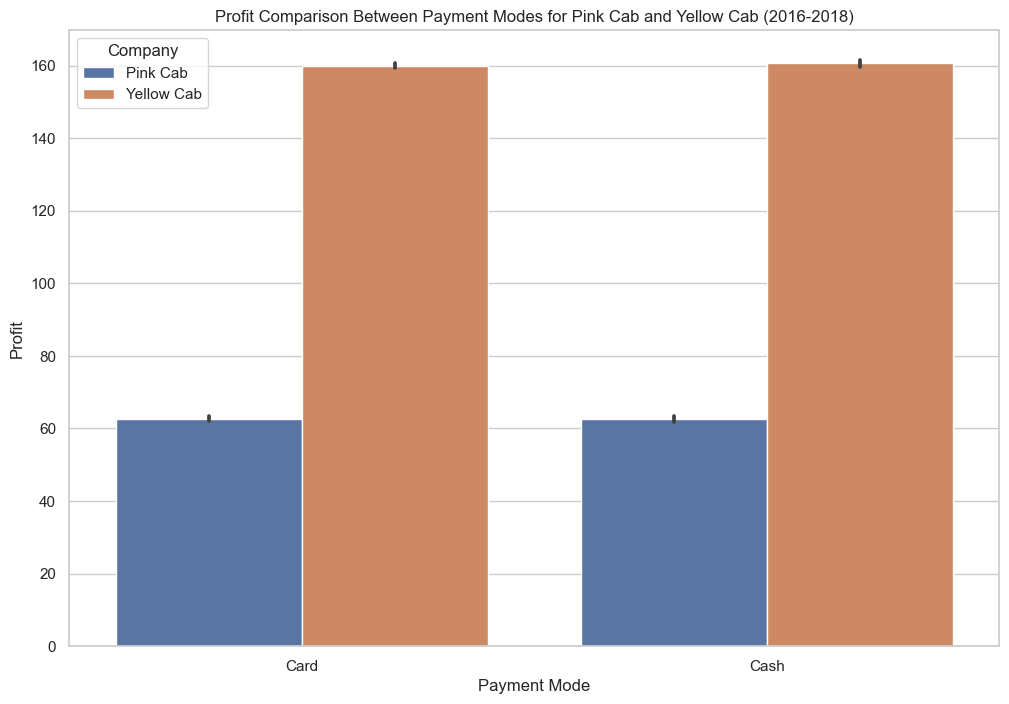

In [23]:
sns.set(style="whitegrid")

filtered_data = Masterdata[(Masterdata['Company'].isin(['Pink Cab', 'Yellow Cab'])) & 
                           (Masterdata['Year'].isin([2016, 2017, 2018]))]

# Plotting the profit comparison between payment modes using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Payment_Mode', y='Profit', hue='Company', data=filtered_data)
plt.title('Profit Comparison Between Payment Modes for Pink Cab and Yellow Cab (2016-2018)')
plt.xlabel('Payment Mode')
plt.ylabel('Profit')
plt.show()


There is almost equal transactions by cash or card by both companies

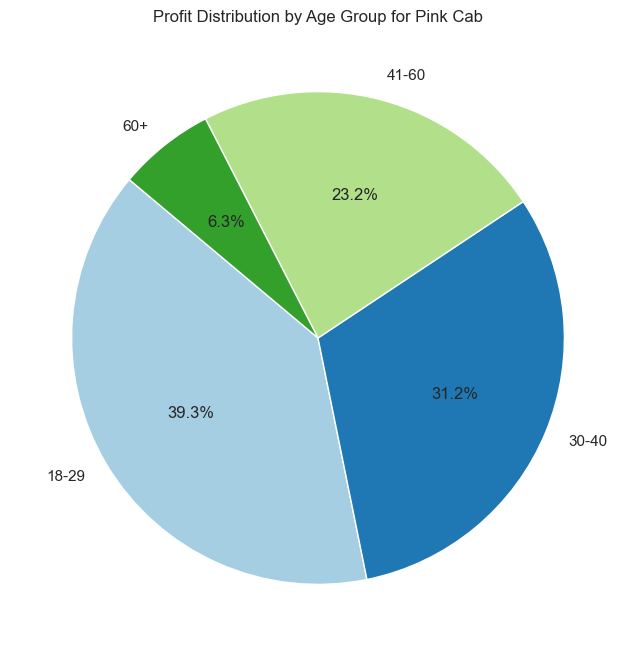

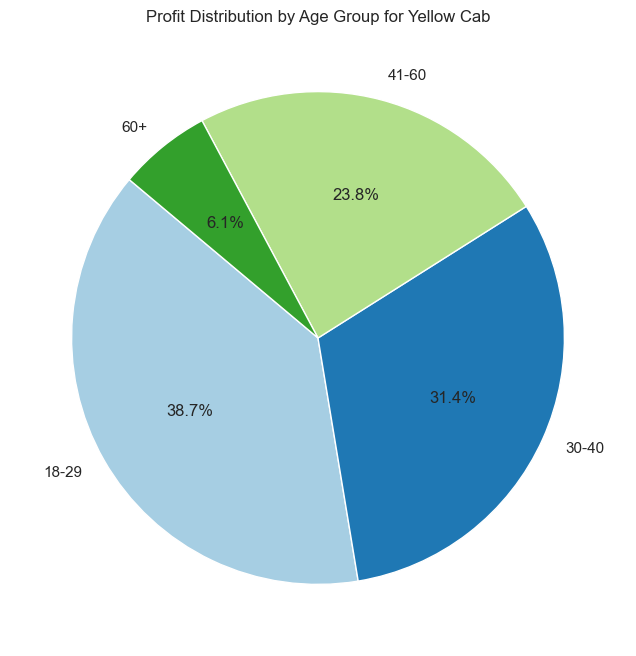

In [24]:
# Creating age groups
bins = [18, 30, 40, 60, float('inf')]
labels = ['18-29', '30-40', '41-60', '60+']

# New column 'Age Group' to Masterdata
Masterdata['Age Group'] = pd.cut(Masterdata['Age'], bins=bins, labels=labels, right=False)

# Groupby Age Group and Cab Company
age_profit_sum = Masterdata.groupby(['Age Group', 'Company'])['Profit'].sum().reset_index()

# Create a separate pie chart for each cab company
cab_companies = ['Pink Cab', 'Yellow Cab']

for company in cab_companies:
    plt.figure(figsize=(8, 8))
    company_data = age_profit_sum[age_profit_sum['Company'] == company]
    plt.pie(company_data['Profit'], labels=company_data['Age Group'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f'Profit Distribution by Age Group for {company}')
    plt.show()


#### Both cab companies have profit contribution from age group of 18-29. Other than that both companies has almost equal % profit share from different age groups

In [25]:
# Finding repeat customers on the basis of Customer ID
repeat_customers = Masterdata['Customer ID'].value_counts()

# repeat customers who travelled more than once
repeat_customers = repeat_customers[repeat_customers > 1]
repeat_customers_data = Masterdata[Masterdata['Customer ID'].isin(repeat_customers.index)]

# Count the occurrences of each cab company for repeat customers
cab_preference_count = repeat_customers_data.groupby(['Customer ID', 'Company']).size().reset_index(name='Count')

# Display the result
print("Cab Preference Count for Repeat Customers:")
print(cab_preference_count.head())


Cab Preference Count for Repeat Customers:
   Customer ID     Company  Count
0            1    Pink Cab      4
1            1  Yellow Cab     25
2            2    Pink Cab      4
3            2  Yellow Cab     36
4            3    Pink Cab      6


#### Customer ID 1 has taken 4 rides with Pink Cab and 25 rides with Yellow Cab.
#### Customer ID 2 has taken 4 rides with Pink Cab and 36 rides with Yellow Cab.
#### Customer ID 3 has taken 6 rides with Pink Cab.

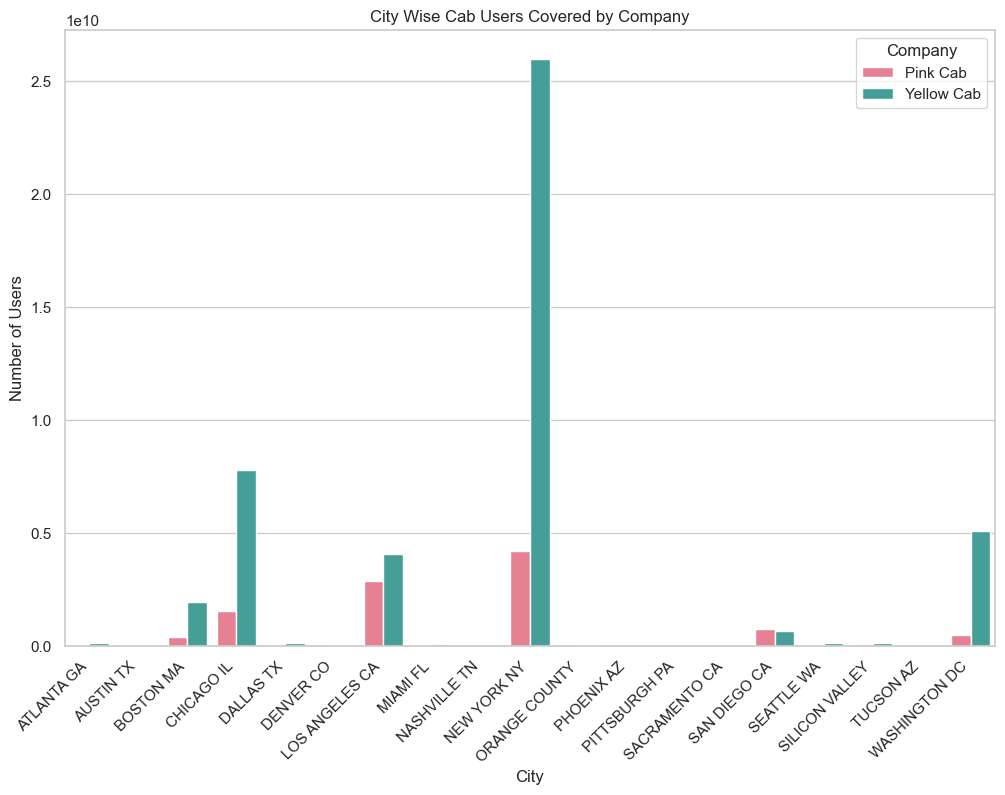

In [26]:
# Groupby City, Company and calculate the sum of users
users_by_city_company = Masterdata.groupby(['City', 'Company'])['Users'].sum().reset_index()

# Plotting bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='Users', hue='Company', data=users_by_city_company, palette='husl')
plt.title('City Wise Cab Users Covered by Company')
plt.xlabel('City')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Company')
plt.show()


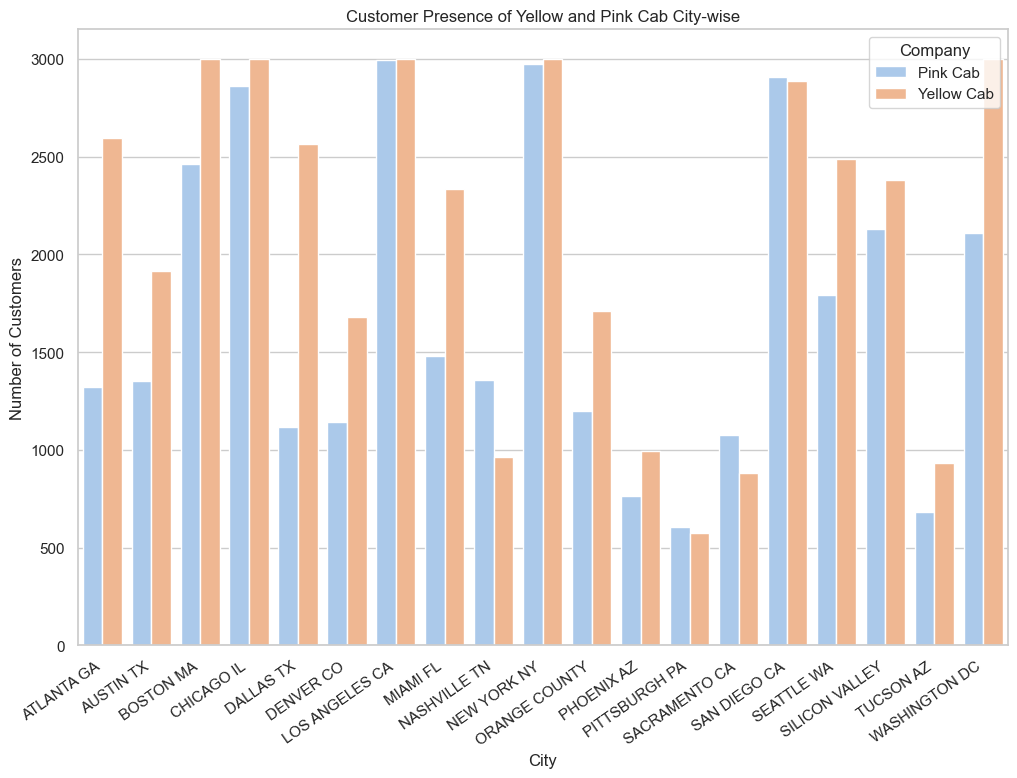

In [27]:
# Groupby using columns City, Company and count customers
customer_presence = Masterdata.groupby(['City', 'Company'])['Customer ID'].nunique().reset_index()

# Plotting the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='City', y='Customer ID', hue='Company', data=customer_presence, palette='pastel')
plt.title('Customer Presence of Yellow and Pink Cab City-wise')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=35, ha='right')
plt.legend(title='Company')
plt.show()

#### Pink Cab has a greater customer reach compared to Yellow Cab in four cities out of the total 19 cities. These cities are:
1.San Diego
2.Nashville
3.Sacramento
4.Pittsburgh

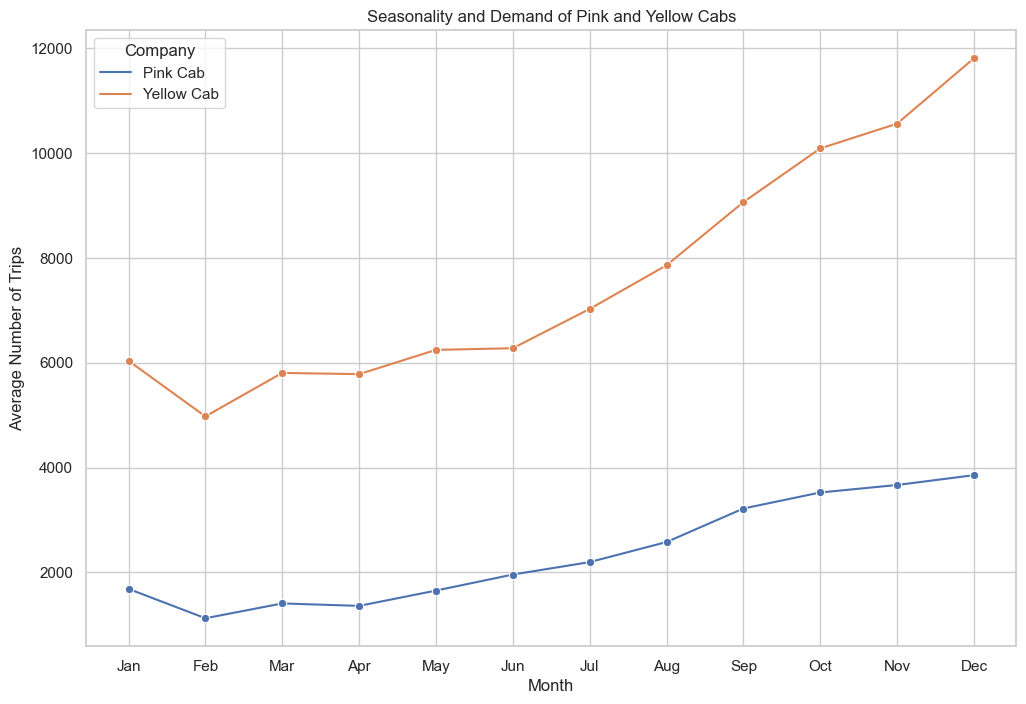

In [28]:
Masterdata['Month'] = Masterdata['Date of Travel'].dt.month
Masterdata['Year'] = Masterdata['Date of Travel'].dt.year

average_trips_per_month = Masterdata.groupby(['Year', 'Month', 'Company'])['Transaction ID'].count().reset_index()
average_trips_per_month = average_trips_per_month.groupby(['Month', 'Company'])['Transaction ID'].mean().reset_index()

# Plotting line graph
plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Transaction ID', hue='Company', data=average_trips_per_month, marker='o')
plt.title('Seasonality and Demand of Pink and Yellow Cabs')
plt.xlabel('Month')
plt.ylabel('Average Number of Trips')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Company')
plt.show()


We can interpret from above line graph that average number of trips for both comapanies increases from July to December. December being the highest, while the lowest trips are in the month of February.

C:\Users\Purvesh\AppData\Local\Temp\ipykernel_13948\3346529122.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ride_customer_analysis = Masterdata.groupby(['Day_of_Week'])['Transaction ID', 'Customer ID'].agg({'Transaction ID':'count', 'Customer ID':'nunique'}).reset_index()


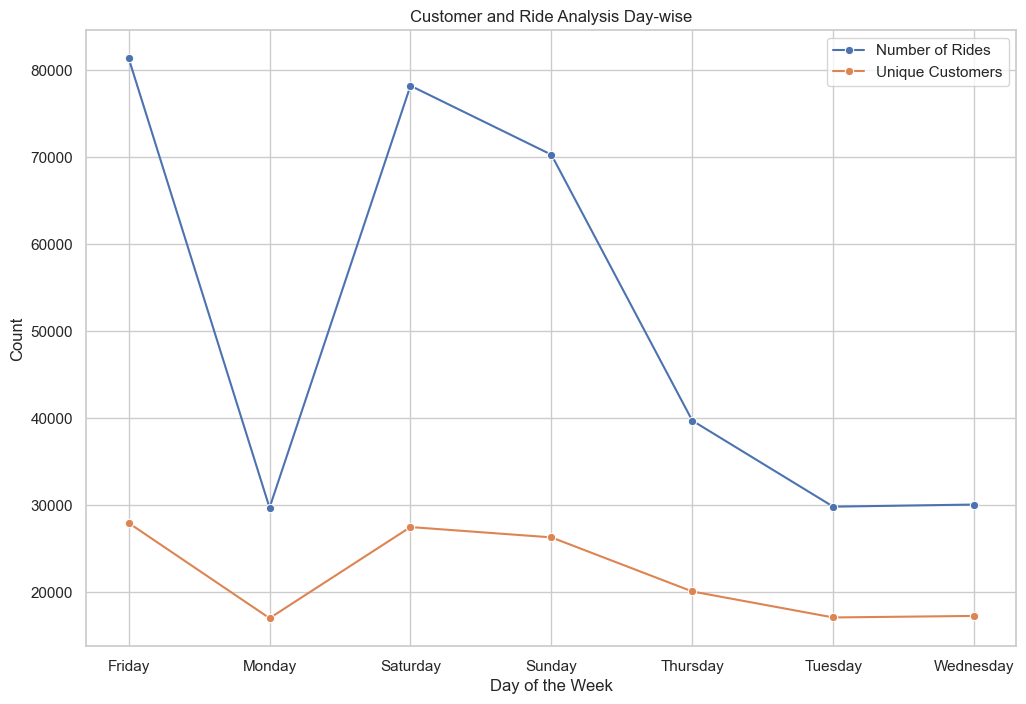

In [29]:
# Extract the day of the week
Masterdata['Day_of_Week'] = Masterdata['Date of Travel'].dt.day_name()

# Groupby 'Day_of_Week', calculate the count of rides
ride_customer_analysis = Masterdata.groupby(['Day_of_Week'])['Transaction ID', 'Customer ID'].agg({'Transaction ID':'count', 'Customer ID':'nunique'}).reset_index()

# Plotting line graph
plt.figure(figsize=(12, 8))
sns.lineplot(x='Day_of_Week', y='Transaction ID', data=ride_customer_analysis, marker='o', label='Number of Rides')
sns.lineplot(x='Day_of_Week', y='Customer ID', data=ride_customer_analysis, marker='o', label='Unique Customers')
plt.title('Customer and Ride Analysis Day-wise')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend()
plt.show()

Both companies show higher demand during weekends.

C:\Users\Purvesh\AppData\Local\Temp\ipykernel_13948\4232594318.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pink_ride_customer_analysis = pink_cab_data.groupby(['Day_of_Week'])['Transaction ID', 'Customer ID'].agg({'Transaction ID':'count', 'Customer ID':'nunique'}).reset_index()
C:\Users\Purvesh\AppData\Local\Temp\ipykernel_13948\4232594318.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yellow_ride_customer_analysis = yellow_cab_data.groupby(['Day_of_Week'])['Transaction ID', 'Customer ID'].agg({'Transaction ID':'count', 'Customer ID':'nunique'}).reset_index()


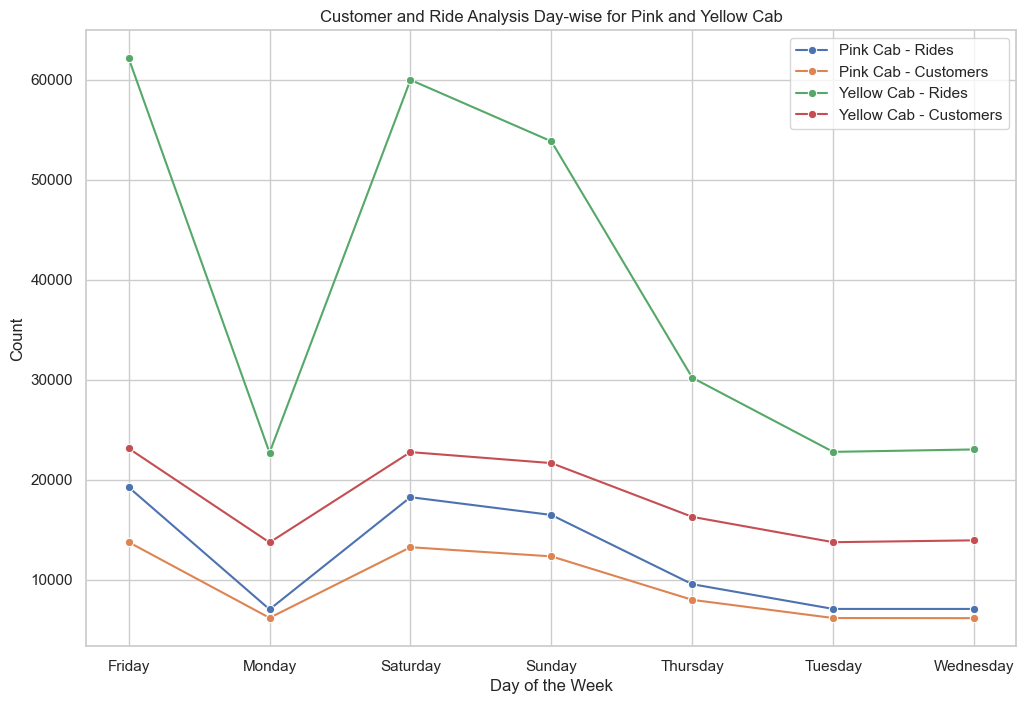

In [30]:
Masterdata['Day_of_Week'] = Masterdata['Date of Travel'].dt.day_name()

pink_cab_data = Masterdata[Masterdata['Company'] == 'Pink Cab']
yellow_cab_data = Masterdata[Masterdata['Company'] == 'Yellow Cab']

pink_ride_customer_analysis = pink_cab_data.groupby(['Day_of_Week'])['Transaction ID', 'Customer ID'].agg({'Transaction ID':'count', 'Customer ID':'nunique'}).reset_index()

yellow_ride_customer_analysis = yellow_cab_data.groupby(['Day_of_Week'])['Transaction ID', 'Customer ID'].agg({'Transaction ID':'count', 'Customer ID':'nunique'}).reset_index()

# Plotting line graphs
plt.figure(figsize=(12, 8))
sns.lineplot(x='Day_of_Week', y='Transaction ID', data=pink_ride_customer_analysis, marker='o', label='Pink Cab - Rides')
sns.lineplot(x='Day_of_Week', y='Customer ID', data=pink_ride_customer_analysis, marker='o', label='Pink Cab - Customers')
sns.lineplot(x='Day_of_Week', y='Transaction ID', data=yellow_ride_customer_analysis, marker='o', label='Yellow Cab - Rides')
sns.lineplot(x='Day_of_Week', y='Customer ID', data=yellow_ride_customer_analysis, marker='o', label='Yellow Cab - Customers')
plt.title('Customer and Ride Analysis Day-wise for Pink and Yellow Cab')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend()
plt.show()


# 4. Hypothesis Testing

## 4.1: 1st Hypothesis: Pink Cab has a higher number of female customers compared to Yellow Cab.

### Null Hypothesis (H0): There is no significant difference in the number of female customers between Pink Cab and Yellow Cab.

### H1 (Alternative Hypothesis): Pink Cab has a significantly higher number of female customers than Yellow Cab.

### Test used to perform: Chi-square test

In [31]:
gender_table = pd.crosstab(Masterdata['Company'], Masterdata['Gender'])
chi2_stat, p_value, _, _ = stats.chi2_contingency(gender_table)
print(f"\nHypothesis 1 Results:")
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")


Hypothesis 1 Results:
Chi-square Statistic: 107.22063897254299
P-value: 3.982674650131372e-25


### Hypothesis 1 Result - Reject the null hypothesis and accepting  H1
#### Pink Cab has a significantly different number of female customers compared to Yellow Cab

## 4.2 : 2nd Hypothesis: The profit margin per kilometer for Yellow Cab is higher than for Pink Cab.

### H0: There is no significant difference in profit margin per kilometer between Pink Cab and Yellow Cab.
### H1: The profit margin per kilometer for Yellow Cab is significantly higher than for Pink Cab.
#### Test used to check: Independent two-sample t-test.

In [32]:
Masterdata['Profit per KM'] = Masterdata['Profit']/Masterdata['KM Travelled']
pink_cab_profit = Masterdata[Masterdata['Company'] == 'Pink Cab']['Profit per KM']
yellow_cab_profit = Masterdata[Masterdata['Company'] == 'Yellow Cab']['Profit per KM']
t_stat, p_value = stats.ttest_ind(pink_cab_profit, yellow_cab_profit, equal_var=False)
print(f"\nHypothesis 2 Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


Hypothesis 2 Results:
T-statistic: -300.6484190721257
P-value: 0.0


### Hypothesis 2 Result - Rejecting the null hypothesis and accepting H1

## 4.3 : 3rd Hypothesis: Pink Cab attracts younger customers compared to Yellow Cab.

### H0: There is no significant age difference between customers of Pink Cab and Yellow Cab.
### H1: Pink Cab attracts significantly younger customers compared to Yellow Cab.
#### Test: Independent two-sample t-test.

In [33]:
pink_cab_age = Masterdata[Masterdata['Company'] == 'Pink Cab']['Age']
yellow_cab_age = Masterdata[Masterdata['Company'] == 'Yellow Cab']['Age']
t_stat, p_value = stats.ttest_ind(pink_cab_age, yellow_cab_age, equal_var=False)
print(f"\nHypothesis 3 Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


Hypothesis 3 Results:
T-statistic: -0.37672404840790447
P-value: 0.7063792591441194


### Hypothesis 3 Result - Pink Cab does not attract significantly younger or older customers compared to Yellow Cab

## 4.4 :  4th Hypothesis: The demand for cab services increases during weekends.

### H0: There is no significant difference in the number of rides between weekdays and weekends.
### H1: The demand for cab services significantly increases during weekends.
#### Test: Paired t-test

In [34]:
Masterdata['Weekday'] = Masterdata['Date of Travel'].dt.day_name()

# Create a binary column indicating whether it's a weekend or not
Masterdata['IsWeekend'] = Masterdata['Weekday'].isin(['Saturday', 'Sunday'])

# Separate the data for weekends and weekdays
weekend_data = Masterdata[Masterdata['IsWeekend']]
weekday_data = Masterdata[~Masterdata['IsWeekend']]

# Ensure that the lengths are the same
min_length = min(len(weekend_data), len(weekday_data))
weekend_data = weekend_data.iloc[:min_length, :]
weekday_data = weekday_data.iloc[:min_length, :]

# Hypothesis test: Paired t-test
t_stat, p_value = ttest_rel(weekend_data['Transaction ID'], weekday_data['Transaction ID'])

print(f"\nHypothesis 4 Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")



Hypothesis 4 Results:
T-statistic: -70.8458632226808
P-value: 0.0


### Hypothesis 4 Result: Reject the null hypothesis and conclude demand for cab services increases during weekends.

## 4.5 : 5th Hypothesis: Customers using Pink Cab have a higher average income compared to Yellow Cab customers.

### H0: There is no significant difference in the average income of customers between Pink Cab and Yellow Cab.
### H1: Customers using Pink Cab have a significantly higher average income compared to Yellow Cab customers.
#### Test: Independent two-sample t-test.

In [35]:
# Hypothesis test: Independent two-sample t-test
pink_cab_income = Masterdata[Masterdata['Company'] == 'Pink Cab']['Income (USD/Month)']
yellow_cab_income = Masterdata[Masterdata['Company'] == 'Yellow Cab']['Income (USD/Month)']

t_stat, p_value = ttest_ind(pink_cab_income, yellow_cab_income, equal_var=False)

print(f"\nHypothesis 5 Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


Hypothesis 5 Results:
T-statistic: 0.42631105474487024
P-value: 0.6698818568949252


### Hypothesis 5 Result: Reject the null hypothesis and accept there is not much difference in average income of customers between yellow and pink cabs.

## 4.6 : 6th Hypothesis: The profit generated by Yellow Cab is positively correlated with the population of the city.

### H0: There is no significant correlation between profit and city population for Yellow Cab.
### H1: The profit generated by Yellow Cab is significantly positively correlated with the population of the city.
#### Test: Pearson correlation coefficient.

In [36]:
# Assuming 'Profit' and 'Population' are columns in Masterdata
yellow_cab_data = Masterdata[Masterdata['Company'] == 'Yellow Cab']

# Hypothesis test: Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(yellow_cab_data['Profit'], yellow_cab_data['Population'])

print(f"\nHypothesis 6 Results:")
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")
print("Conclusion: The profit generated by Yellow Cab is significantly positively correlated with the population of the city.")



Hypothesis 6 Results:
Pearson Correlation Coefficient: 0.5722801261987683
P-value: 0.0
Conclusion: The profit generated by Yellow Cab is significantly positively correlated with the population of the city.


### Hypothesis 6 Result: Accept H1 stating that profit generated by yellow cab is positively co-related with the population of that city.

# 5. Conclusion
#### The analysis of the data provided valuable insights for XYZ to make an informed decision about their investment. Here are the key findings and conclusions:

# 5.1 Summary of Findings

## Customer Demographics:

Pink Cab has a significantly different number of female customers compared to Yellow Cab.
There is no significant age difference between customers of Pink Cab and Yellow Cab.
Customers using Pink Cab do not have a significantly different average income compared to Yellow Cab customers.

## Company Performance:

Yellow Cab has a higher profit percentage than Pink Cab over the years.
Yellow Cab has a higher profit margin per kilometer compared to Pink Cab.
Yellow Cab has a higher return on investment.
Both companies have almost equal transactions by cash or card.

## Market Reach:

Pink Cab has a greater customer reach compared to Yellow Cab in four cities out of the total 19 cities. These cities are San Diego, Nashville, Sacramento, and Pittsburgh. And yellow cab has 15 cities with higher customer reach
Both companies show higher demand during weekends.

## Seasonal Trends:

The average number of trips for both companies increases from July to December, with December being the highest.
Both companies show higher demand during weekends.


# 5.2 Recommendations

XYZ should consider the market reach and demand patterns in specific cities. Investing in cities where Yellow Cab has a stronger presence might be beneficial.

Consideration should be given to the profit margin per kilometer, as Yellow Cab has demonstrated higher profitability in this aspect.

Both companies have similar customer demographics in terms of age and income. Marketing strategies should be tailored to specific customer preferences.

Further analysis of the seasonal trends can help in optimizing resource allocation and marketing efforts during peak demand months.

# 5.3 Future Work

Conduct a more detailed analysis of customer satisfaction and feedback data to understand the factors influencing customer preferences.

Explore additional external factors (e.g., economic indicators, local events) that might impact the demand for cab services.

Implement predictive modeling to forecast future demand and profitability, helping XYZ in strategic planning.